In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import torch.optim as optim
from torch.autograd import Variable
import numpy.random as rand
import numpy as np
import sys
import os
os.getcwd()

'/content'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [0]:
# Real dataset
#Emerson's Paths:
small_trained_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/smallTrainCleaned.csv"
y_label_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/y_labels.csv"
#small_trained_path = "/content/drive/My Drive/Tufts/Tufts '19-20/Fall 2019/Comp150-03 - Bayesian Deep Learning/Final Project: Get Churn't/data/smallTrainCleaned.csv"
#y_label_path = "/content/drive/My Drive/Tufts/Tufts '19-20/Fall 2019/Comp150-03 - Bayesian Deep Learning/Final Project: Get Churn't/data/y_labels.csv"
data = pd.read_csv(small_trained_path)
Y = pd.read_csv(y_label_path)

data['Y'] = Y
data['Y'][data['Y'] == -1] = 0
data = data.sample(frac=1).reset_index(drop=True)

print(Y)

In [0]:
batch_size = 100
n_iters = 3000

num_epochs = int(n_iters / (data.shape[0] / batch_size))

train_size = int(0.8 * len(data))
test_size = len(data) - train_size

train_dataset = data[:train_size]
test_dataset = data[train_size:]


train_y = train_dataset['Y']
train_dataset = train_dataset.drop('Y', axis=1)

test_y = test_dataset['Y']
test_dataset = test_dataset.drop('Y', axis=1)


train_loader = torch.utils.data.DataLoader(
                  torch.utils.data.TensorDataset(
                      torch.tensor(train_dataset.values),
                      torch.tensor(train_y.values)),
                  batch_size=batch_size,
                  shuffle=True)



test_loader = torch.utils.data.DataLoader(
                  torch.utils.data.TensorDataset(
                      torch.tensor(test_dataset.values),
                      torch.tensor(test_y.values)),
                  batch_size=batch_size,
                  shuffle=True)

NameError: ignored

In [0]:
# Toy dataset
X_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/toy_x.csv"
y_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/toy_y.csv"

X = np.loadtxt(X_path, delimiter=',', dtype=np.float64)[:1000]
y = np.loadtxt(y_path, delimiter=',', dtype=np.float64)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)


OSError: ignored

In [2]:
W = np.array([2, 1]).reshape(-1, 1)
b = -5
X_train = np.random.uniform(-10,10, (5000, 2))
X_train[:,0] = 0.0
X_train.shape
W.T.shape

eps = 0.0001
W_s = np.array([0.0, 1.0]).reshape(-1, 1)
print(W_s)
b_s = -1 * (-10 * 0.0 + -10 * 1.0) + eps

print(b_s)

y_train = np.zeros((X_train.shape[0], 1), dtype=float)
for ind, x in enumerate(X_train):
  y_train[ind] = x @ W + b + np.random.normal(loc=0, scale=x @ W_s + b_s)



print(y_train)

[[0.]
 [1.]]
10.0001
[[-16.27543075]
 [  8.46085611]
 [-21.82833129]
 ...
 [ 25.40277715]
 [-14.72096942]
 [ 31.07511251]]


(5000, 2)


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


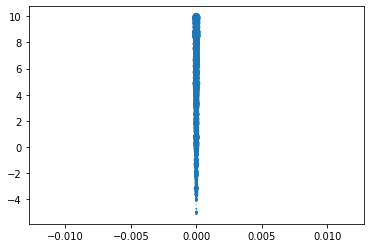

In [0]:
print(X_train.shape)
plt.scatter(X_train[:,0], X_train[:,1], y_train)

[[-16.61331772]
 [ 16.35495996]
 [-22.56185574]
 ...
 [ 11.03949553]
 [-10.83789251]
 [ -4.11187812]]
[[ 0.         -7.06352362]
 [ 0.          6.7413767 ]
 [ 0.          9.67948288]
 ...
 [ 0.          4.51064562]
 [ 0.          1.47216329]
 [ 0.          0.06372645]]


Text(0.5, 0, 'output[:,1] (Standard Deviation)')

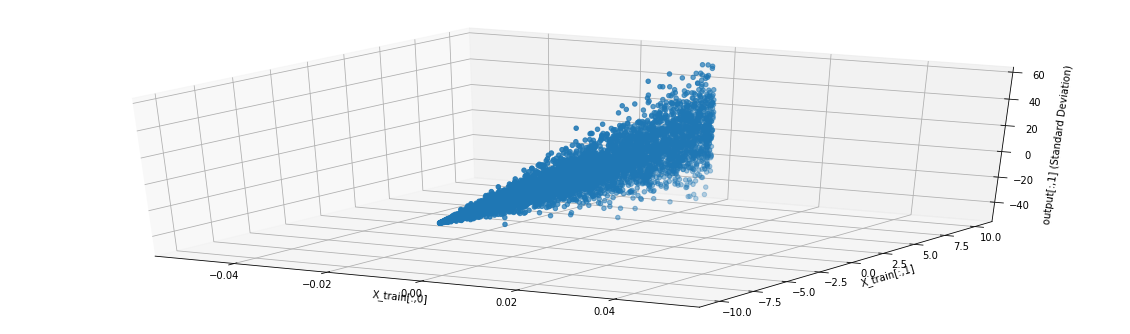

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

print(y_train)
print(X_train)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(311, projection='3d')

sparse_cap = int(len(X_train) / 10)

ax.scatter(X_train[:,0], X_train[:,1], y_train)
ax.set_xlabel('X_train[:,0]')
ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('output[:,1] (Standard Deviation)')


In [0]:
'''
STEP 1: LOADING DATASET   
'''


'\nSTEP 1: LOADING DATASET   \n'

In [0]:
'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


NameError: ignored

In [0]:
X_train.shape

(5000, 2)

In [0]:
'''
STEP 2.5: MODEL HELPER FUNCTIONS
'''

def gauss_logpdf(x, mu, s):
    normalized_x = (x - mu) / s
    # if isinstance(x, torch.Tensor):
    logprob = (-1 * (normalized_x ** 2) / 2) - 0.5 * np.log(2 * np.pi)
    # if isinstance(x, numpy.ndarray):
    #     logprob = (-1 * (normalized_x ** 2) / 2) - 0.5 * np.log(2 * np.pi)
    return logprob
  


# probably want to change name of this to sigmoid_torch
def sigmoid(x):
    return (1/(1+torch.exp(-1*x)))

def sigmoid_np(x):
    return (1/(1+np.exp(-1*x)))


In [0]:
# - Rewrite predict functions
# - Review likelihood
#

              # for all layers before output layer should look like:
              # output = self.l1_relu(self.l1(X, predict))


In [0]:
'''
STEP 3: CREATE MODEL CLASS
'''

class BNNLayer(nn.Module):
    def __init__(self, input_dim=30, output_dim=2, prior_mu=0, prior_s=0.01):
        super(BNNLayer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.prior_mu = prior_mu
        self.prior_s = prior_s

        # Means of weights, shape input by output
        # self.W_mu_DO = nn.Parameter(torch.Tensor(input_dim, output_dim).normal_(prior_mu, prior_s))
        self.W_mu_DO = nn.Parameter(torch.Tensor(input_dim, output_dim).normal_(0, 0.1))
        # Log std of weights, shape input by output
        self.W_log_s_DO = nn.Parameter(torch.Tensor(input_dim, output_dim).normal_(0, 0.1))

        # Means of biases, shape output dim
        self.b_mu_O = nn.Parameter(torch.Tensor(output_dim).normal_(0, 0.1))
        # Log stds of biases, shape output dim
        self.b_log_s_O = nn.Parameter(torch.Tensor(output_dim).normal_(0, 0.1))

        self.log_prior = 0
        self.log_post_est = 0

    def W_b_by_reparam(self):      
        # Reparameterization
        rand_norm_DO = torch.Tensor(self.input_dim, self.output_dim).normal_(0, 1)
        rand_norm_O = torch.Tensor(self.output_dim).normal_(0, 1)
        W_DO = self.W_mu_DO + rand_norm_DO * torch.exp(self.W_log_s_DO)
        b_O = self.b_mu_O + rand_norm_O * torch.exp(self.b_log_s_O)
        return (W_DO, b_O)



    # forward for one layer will sample the weights for that layer, and output 
    # the full output of that layer!

    # Return matrix [num_preds x output_size]
    # if predict=False (i.e. being used in training), then we reuse same posterior 
    # draw for each prediction. If predict = True, then we use different draws from the
    # posterior for each vectorized prediction

    # D is input dimension, O is output dimension 
    def forward(self, X_ND, predict=False, num_preds=1):
        # IMPLEMENT IF PREDICT, REUSE SAME POSTERIOR DRAW IN PREDICTION

        if predict:
            # print("W_mu_DO shape: ", self.W_mu_DO.shape)
            (W_DO, b_O) = self.W_b_by_reparam()
            pred = torch.mm(X_ND, W_DO) + b_O.expand(X_ND.size()[0], self.output_dim)
            # print("pred dims: ", pred.shape)
            return pred

        (W_DO, b_O) = self.W_b_by_reparam()

        # Note: Updating batch by batch, not datapoint by datapoint
        # OK, more than one prediction at once getting very confusing. Leaving as 
        # is for now, come back to it later to decide how good of an idea it actually is
        if num_preds > 1:
            outputs = []
            log_priors = []
            log_post_ests = []
            for i in range(num_preds):
                output = torch.mm(X_ND, W_DO) + b_O.expand(X_ND.size()[0], self.output_dim)
                outputs.append(output.reshape(1, output.shape[0], output.shape[1]))
                log_prior = gauss_logpdf(W_DO, self.prior_mu, self.prior_s).sum() + gauss_logpdf(b_O, self.prior_mu, self.prior_s).sum()
                log_priors.append(log_prior.reshape(1, 1))
                log_post_est = (gauss_logpdf(W_DO, self.W_mu_DO, torch.exp(self.W_log_s_DO)).sum() +
                                gauss_logpdf(b_O, self.b_mu_O, torch.exp(self.b_log_s_O)).sum())
                log_post_ests.append(log_post_est.reshape(1, 1))
            output = torch.cat(outputs, dim=0)
            self.log_prior = torch.cat(log_priors, dim=0)
            self.log_post_ests = torch.cat(log_post_ests, dim=0)            

        elif num_preds == 1:
            output = torch.mm(X_ND, W_DO) + b_O.expand(X_ND.size()[0], self.output_dim)
            # print("output shape: ", output.shape)
            self.log_prior = (gauss_logpdf(W_DO, self.prior_mu, self.prior_s).sum() + 
                              gauss_logpdf(b_O, self.prior_mu, self.prior_s).sum()) 

            self.log_post_est = (gauss_logpdf(W_DO, self.W_mu_DO, torch.exp(self.W_log_s_DO)).sum() +
                                 gauss_logpdf(b_O, self.b_mu_O, torch.exp(self.b_log_s_O)).sum())
        else:
            raise(ValueError)
        return output


class BNN(nn.Module):
    def __init__(self, input_dim, prior_mu=0, prior_s=0.01, linear_regression=False):
          super(BNN, self).__init__()
          self.input_dim = input_dim
          self.hidden_1_dim = 5
          self.hidden_2_dim = 5
          self.output_dim = 2
          self.prior_mu = prior_mu
          self.prior_s = prior_s

          self.linear_regression = linear_regression

          if not linear_regression:
              self.l1 = BNNLayer(self.input_dim, self.hidden_1_dim, self.prior_mu, self.prior_s)
              self.activ_1_2 = nn.LeakyReLU()
              self.l2 = BNNLayer(self.hidden_1_dim, self.hidden_2_dim, self.prior_mu, self.prior_s)
              self.activ_2_3 = nn.LeakyReLU()
              self.l3 = BNNLayer(self.hidden_2_dim, self.output_dim, self.prior_mu, self.prior_s)
          else:
              self.l1 = BNNLayer(self.input_dim, 2, self.prior_mu, self.prior_s) 
          
          # Not used for std dev prediction
          self.classification_threshold = 0.5
          self.pred_sigmoid = nn.Sigmoid()


    def forward(self, X_ND, predict=False, num_preds=1):
          if not self.linear_regression:
              output = self.activ_1_2(self.l1(X_ND, predict, num_preds))
              output = self.activ_2_3(self.l2(output, predict, num_preds))
              output = self.l3(output, predict, num_preds)
          else:
              output = self.l1(X_ND, predict, num_preds)

          # format of this might be weird, but don't really need var anymore
          if predict:
              continuous_pred = output[:,0]

              # everything below return statement for classification
              return continuous_pred

              # print("continuous pred: ", continuous_pred[:5].detach().numpy())

              # need to look if 1 is churn or not churn in dataset
              prob_of_one = self.pred_sigmoid(continuous_pred)
              prob_of_one = prob_of_one.detach().numpy()

              # print("prob of 1: ", prob_of_one[:5])

              pred = (prob_of_one > self.classification_threshold).astype(int)
              # print("pred: ", pred[:5])
              output = pred

          return output

    def calc_total_log_prior_log_post_est(self):
          if not self.linear_regression:
            total_log_prior = self.l1.log_prior + self.l2.log_prior + self.l3.log_prior
            total_log_post_est = self.l1.log_post_est + self.l2.log_post_est + self.l3.log_post_est
            return total_log_prior, total_log_post_est
          else:
            return self.l1.log_prior, self.l1.log_post_est
    # Returns churn/not binary churn predictions (nx1) for data X (nxd)
    # as numpy?? tensor??
    




class BNNBayesbyBackprop(nn.Module):
    def __init__(self, nn_dims=None, prior_mu=10, prior_s=0.05, num_MC_samples=100):
        '''
        nn_dims : list of layer sizes from input to output layer (of form: [input_dim, hidden_layer_1_dim, ..., output_dim])
          Note: optim taking in model.parameters has to have them specified as individual self.linear1, self.linear2 attributes, not as a list of nn.linear's
          @TODO: For now, assume just one input layer, one output layer, no hidden layers for linear model
        '''
        super(BNNBayesbyBackprop, self).__init__()
        
        self.prior_mu = prior_mu
        self.prior_s = prior_s
        self.num_MC_samples = num_MC_samples

        # self.model = BNN(38, self.prior_mu, self.prior_s)
        self.model = BNN(2, self.prior_mu, self.prior_s)


    # @TODO: Does this scale with "batch size" or "traning set size" or what?
    def MC_elbo(self, X_ND, y_N, curr_batch, n_batches):
        # out[0] is the predicted mean, out[1] is the predicted std_dev
        aggregate_log_prior, aggregate_log_post_est, aggregate_log_likeli, aggregate_log_s_N = 0.0, 0.0, 0.0, 0.0
        for i in range(self.num_MC_samples):
            nn_output_mu_N = self.model(X_ND)

            nn_output_log_s_N = nn_output_mu_N[:,1]
            nn_output_log_s_N = torch.clamp(nn_output_log_s_N, min=np.log(0.5), max=np.log(50))

            # Artificial average value 
            #nn_output_mu_N[:,0] = torch.mm(X_ND, torch.tensor(W).float()) + torch.tensor(b)
            #nn_output_log_s_N = torch.ones(nn_output_mu_N[:,1].shape)


            # Aggregated probabilities across an entire batch/trainset for each sample
            sample_log_likeli = self.likelihood_est(y_N, nn_output_mu_N[:,0], nn_output_log_s_N)
            sample_log_prior, sample_log_post_est = self.model.calc_total_log_prior_log_post_est()

            # Aggregating probabilities across all samples
            aggregate_log_prior += sample_log_prior
            aggregate_log_post_est += sample_log_post_est
            aggregate_log_likeli += sample_log_likeli
            # aggregate_log_s_N += nn_output_log_s_N.mean()


        if (curr_batch == n_batches -1):
          #We assume that it is a scalar representing the total log prior(w, b) across all samples
          print("mean log prior ", aggregate_log_prior.detach().numpy() / self.num_MC_samples)
          print("mean log post est ", aggregate_log_post_est.detach().numpy() / self.num_MC_samples)
          print("mean likelihood est ", aggregate_log_likeli.detach().numpy() / self.num_MC_samples)
          # print("mean log s N est ", 1e6 * aggregate_log_s_N.detach().numpy() / self.num_MC_samples)
          # print("elbo ", (aggregate_log_prior - aggregate_log_post_est) / self.num_MC_samples)
          # return -1 * (aggregate_log_prior - aggregate_log_post_est) / self.num_MC_samples
        return (-1 * (aggregate_log_prior + aggregate_log_likeli - aggregate_log_post_est) / self.num_MC_samples) #+ 1e6 * torch.exp(aggregate_log_s_N) / self.num_MC_samples

    # @TODO: is it gauss_logpdf(y, sigmoid(pred_y), exp(nn_ouput_log_s_N))? or is it: MC sample: sigmoid(sample from N(pred_y, exp(nn_ouput_log_s_N))), threshold at [0.5]?
    def likelihood_est(self, y_N, nn_output_mu_N, nn_output_log_s_N, MC_samples=20):
        pred_thresh = 0.5
        
        stds = torch.exp(nn_output_log_s_N)#10 * torch.ones([y_N.shape[0]], dtype=torch.float64) #
        log_likelihood_N = gauss_logpdf(y_N.reshape(-1), nn_output_mu_N, stds)
        log_likelihood = log_likelihood_N.sum()

        classification = False
        if classification:
            # s_NxMC is NxMC where each row holds MC samples, s ~ N(mu(X_n), log_s(X_n))
            # where mu(X_n) and log_s(X_n) are the BNN's predicted values for nth instances
            s_NxMC = torch.new_empty(size=(y_N.shape[0], MC_samples))
            for i in range(MC_samples): 
                s_NxMC[:,i] = torch.normal(nn_output_mu_N,
                                          torch.exp(nn_output_log_s_N))
            sigmoid = nn.Sigmoid()
            probs_of_one_NxMC = sigmoid(s_NxMC)
            avg_prob_of_one_N = probs_of_one_NxMC.mean(dim=1)
            # print("shapes match: ", avg_prob_of_one_NxMC.shape == y_N.shape)
    
            likelihood_N = y_N.new_empty(size=y_N.shape)
            likelihood_N[y_N == 0] = 1 - avg_prob_of_one_N[y_N == 0]
            likelihood_N[y_N == 1] = avg_prob_of_one_N[y_N == 1]
            log_likelihood_N = torch.log(likelihood_N)
            log_likelihood = log_likelihood_N.sum()
            # print("prob of one: ", avg_prob_of_one_N[:5].detach().numpy())
            # print("real ", y_N[:5].detach().numpy())
    
            return log_likelihood_N

        return log_likelihood

    def fit(self, X, y, learning_rate=0.001, n_epochs=100, batch_size=1000, plot=False):
        n_batches = int(np.ceil(X.shape[0] / batch_size))
        optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)

        X_batch = torch.Tensor()
        y_batch = torch.Tensor()
        loss_by_epoch = []
        for e in range(n_epochs):
            batch_losses = []
            for batch_num in range(n_batches):
                # print("batch: ", b, " / ", n_batches)
                batch_start_i = batch_size * batch_num
                if (batch_size * (batch_num + 1)) < X.shape[0]:
                    batch_end_i = batch_size * (batch_num + 1)
                else:
                    batch_end_i = X.shape[0]

                self.model.zero_grad()
                X_batch = torch.Tensor(X[batch_start_i : batch_end_i])
                y_batch = torch.Tensor(y[batch_start_i : batch_end_i])

                loss = self.MC_elbo(X_batch, y_batch, b, n_batches)
                old_weights1 = self.model.l1.W_mu_DO.detach().numpy()[0].flatten()
                old_weights2 = self.model.l1.W_mu_DO.detach().numpy()[1].flatten()
                old_bias = self.model.l1.b_mu_O.detach().numpy().flatten()
                batch_losses.append(loss.detach().numpy())
                # print("Loss: ", loss)
                loss.backward()
                optimizer.step()
            print("grads ", self.model.l1.W_mu_DO.grad, "\n")
            print("change in w1: ", self.model.l1.W_mu_DO.detach().numpy()[0].flatten() - old_weights1,
                   "\ncur w1: ", self.model.l1.W_mu_DO.detach().numpy()[0].flatten(),
                   "\nold w1: ", old_weights1)
            print("change in w2: ", self.model.l1.W_mu_DO.detach().numpy()[1].flatten() - old_weights2,
                   "\ncur w2: ", self.model.l1.W_mu_DO.detach().numpy()[1].flatten(),
                   "\nold w2: ", old_weights2)
            
            print("change in b: ", self.model.l1.b_mu_O.detach().numpy().flatten() - old_bias,
                  "\ncur b: ", self.model.l1.b_mu_O.detach().numpy().flatten(),
                  "\nold b: ", old_bias)
            


            output = self.model(X_batch)


            actual_y_means = torch.mm(X_batch, torch.tensor(W).float()) + torch.tensor(b) # torch.mm(X_batch, torch.tensor(np.array([1, 0.2]).reshape(-1, 1)).float()) + torch.tensor(-5)

            X_full = torch.Tensor(X)
            y_full = torch.Tensor(y)


            pred = self.model(X_full, predict=True)
            
            # classification accuracy
            # acc = (pred == y_full.numpy()).astype(int).sum() / y_full.shape[0]

            # regression accuracy
            acc = torch.abs(pred - y_full.reshape(-1)).mean().detach().numpy()

            cur_epoch_loss = np.array(batch_losses).sum()
            print("Epoch: ", e, "\tLoss: ", cur_epoch_loss, "\tAccuracy: ", acc, '\n')
            # print()
            # print("pred: ", pred.detach().numpy()[:5])
            # print("real: ", y_full.numpy().reshape(-1)[:5])
            loss_by_epoch.append(cur_epoch_loss)

        if plot:
            plt.plot([i for i in range(n_epochs)], loss_by_epoch)



In [0]:
# y_train.reshape(-1)
# np.log(10)
# np.exp(-2.3)
# Maybe we want to plot epoch by mean and std weight values for linear regression model 
# as well as the true weights used to create the toy dataset?

# Seems like a good diagnostic plot which we could include in our report

grads  tensor([[-8.7276e-02,  1.6507e-01, -2.6620e-02, -3.0108e-01, -2.1660e-02],
        [-2.4659e+03, -4.8791e+03,  2.6542e+03,  8.0080e+02,  6.1101e+03]]) 

change in w1:  [ 0.00044902 -0.00080639 -0.00024235 -0.00020346 -0.00045054] 
cur w1:  [-0.09220859  0.06889643  0.04731139  0.0336605   0.0459809 ] 
old w1:  [-0.09265762  0.06970282  0.04755374  0.03386397  0.04643144]
change in w2:  [-3.32750380e-04 -4.31202352e-05 -2.92003155e-04 -2.97963619e-04
 -1.09270215e-04] 
cur w2:  [ 0.06347921 -0.04733862 -0.05743459  0.10226787 -0.07747442] 
old w2:  [ 0.06381197 -0.0472955  -0.05714259  0.10256583 -0.07736515]
change in b:  [-0.00079895 -0.00074363 -0.00058219 -0.00084275 -0.00084411] 
cur b:  [-0.03653942 -0.06096166 -0.28292853  0.11477642 -0.00553075] 
old b:  [-0.03574047 -0.06021803 -0.28234634  0.11561917 -0.00468664]
Epoch:  0 	Loss:  1796829.4 	Accuracy:  17.510336 

grads  tensor([[-1.5845e-01,  4.8539e-02,  1.9276e-02,  3.6300e-01,  1.4634e-01],
        [ 4.2286e+03, -2.

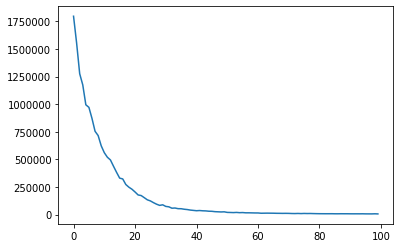

In [5]:
# Hyperparameters that work: prior_s 0.8
# Fix likelihood mean at 1?
bnn = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8)
bnn.fit(X_train, y_train, plot=True, n_epochs=100, learning_rate=1e-3, batch_size=100)

tensor([-1.8153, -1.8133, -1.8039, -1.8700,  1.2721], grad_fn=<SelectBackward>)
tensor([1.3222e+02, 1.4096e+02, 1.9048e+02,  ..., 9.8073e+01, 2.2875e+12,
        1.1219e+02], grad_fn=<ExpBackward>)
[[ 0.          4.73661041]
 [ 0.          4.11907326]
 [ 0.          1.2157431 ]
 ...
 [ 0.          8.47076952]
 [ 0.         -9.8781761 ]
 [ 0.          6.6401352 ]]


Text(0, 0.5, 'output[:,1] (Standard Deviation)')

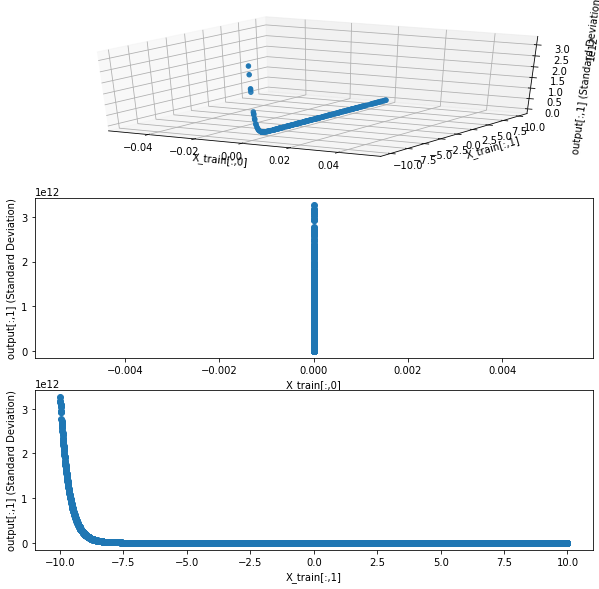

In [6]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

final_pred = bnn.model.forward(torch.Tensor(X_train))
print(final_pred[:5,0])


pred_std = torch.exp(final_pred[:,1])

print(pred_std)
print(X_train)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(311, projection='3d')

sparse_cap = int(len(X_train) / 10)

ax.scatter(X_train[:sparse_cap,0], X_train[:sparse_cap,1], pred_std[:sparse_cap].detach().numpy())
ax.set_xlabel('X_train[:,0]')
ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('output[:,1] (Standard Deviation)')



# 2D Plot:
ax_2d_x = fig.add_subplot(312)
ax_2d_x.scatter(X_train[:,0], pred_std.detach().numpy())
ax_2d_x.set_xlabel('X_train[:,0]')
ax_2d_x.set_ylabel('output[:,1] (Standard Deviation)')


ax_2d_y = fig.add_subplot(313)
ax_2d_y.scatter(X_train[:,1], pred_std.detach().numpy())
ax_2d_y.set_xlabel('X_train[:,1]')
ax_2d_y.set_ylabel('output[:,1] (Standard Deviation)')



[  175.53828    108.77266     67.40114     44.88626     44.476227
    44.069923    43.667347    43.268444    42.873188    42.48154
    42.093475    93.54451    375.46756    756.0983    1204.9972
  1845.3433    2825.98      4327.7363    6627.5356   10149.48
 15542.994   ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


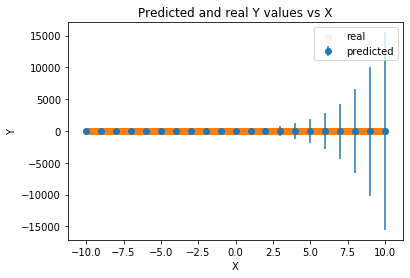

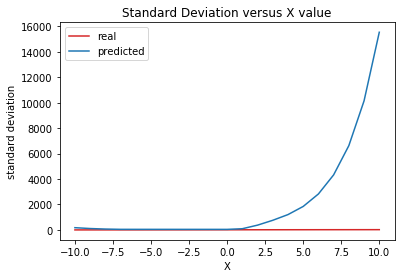

In [40]:
np.zeros(40)
X_sample = np.vstack([np.zeros(21), np.array(list(range(-10,11)))]).T
X_sample = torch.tensor(np.array(X_sample), dtype=torch.float32)


predictions = bnn.model.forward(torch.Tensor(X_train))

sample_pred = bnn.model.forward(X_sample)

y_pred = sample_pred[:,0].detach().numpy()
std_pred = torch.exp(sample_pred[:,1]).detach().numpy()

print(std_pred)

# Sample variance to add to the y predictions
std_array = []
for scale in std_pred:
  std_array.append(np.random.normal(loc=0, scale=np.exp(scale)))
std_array = np.array((std_array))



"""
plt.scatter(X_train[:,0], y_pred + std_array, alpha=.1, label='predicted')
plt.scatter(X_train[:,0], y_train, alpha=.1, label='real')
plt.title("Y hat and Y values across X1")
plt.legend()
plt.savefig("x1_y.png")
"""


plt.show()

# For constant std dev#
#std_pred = 10 * torch.ones([y_pred.shape[0]], dtype=torch.float64)
# For constant std dev#

#plt.scatter(X_train[:,1], y_pred + std_array, alpha=.1, label='predicted')
#plt.scatter(X_sample[:,1], y_pred, alpha=.1, label='predicted')
plt.errorbar(X_sample[:,1], y_pred, yerr=(std_pred), fmt='o', label='predicted')
plt.scatter(X_train[:,1], y_train, alpha=.1, c='C1', label='real')
plt.ylabel("Y")
plt.xlabel("X")
# plt.xlim(right = 5)
# plt.xlim(left = -5)
# plt.ylim(top = 100)
# plt.ylim(bottom = -100)
plt.title("Predicted and real Y values vs X")
plt.legend()
plt.savefig("x_y1.png")
plt.show()



#stds = []
#Xs = list(range(-10, 11))
#for x in Xs:
#    stds.append(x + b_s)

#std_pred = predictions[:,1].detach().numpy()

plt.plot(list(range(-10,11)), list(range(0, 21)), c='C3', label='real')
plt.plot(X_sample[:,1], (std_pred), label='predicted')
plt.title("Standard Deviation versus X value")
plt.ylabel("standard deviation")
plt.xlabel("X")
plt.legend()
plt.savefig("std1.png")
# plt.xlim(right = 5)
# plt.xlim(left = -5)
# plt.ylim(top = 100)
# plt.ylim(bottom = -100)
plt.show()

In [38]:
print(torch.exp(bnn.model.l1.W_log_s_DO))

tensor([[0.1449, 0.1307, 0.1374, 0.1398, 0.1270],
        [0.5950, 0.5896, 0.5357, 0.6016, 0.5273]], grad_fn=<ExpBackward>)


In [0]:

plt.plot([i for i in range(100)], loss_by_epoch)

NameError: ignored